In [124]:
import re
import pandas as pd
import numpy as np
import matplotlib as plt

df=pd.read_csv('/Data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
type(df)

pandas.core.frame.DataFrame

In [80]:
#Coulumns of the Dataframe
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [81]:
#Row,Column
df.shape

(614, 13)

In [82]:
#head of some columns
subset= df[['LoanAmount','Education','Dependents']]
subset.head()

,LoanAmount,Education,Dependents
0,NaN,Graduate,0
1,128.0,Graduate,1
2,66.0,Graduate,0
3,120.0,Not Graduate,0
4,141.0,Graduate,0


In [83]:
df.describe()
#LoanAmount has(614-592) 22 missing values
#Loan_Amount_Term has (612-600) 12 missing values
# Credit_History has (612-564) 50 missing values
#84% have credit history
#ApplicantIncome and CoapplicantIncome seems to be in line with expectation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [97]:
#Non-numerucal value Gender, Married,Education, Self_Employed
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [86]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [87]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [88]:
df['Self_Employed'].value_counts()
#Gender: 13 missing value
#Married has 3 missing values
#education as expected has 614 values
#Self_Employed has (614-582)32 missing values

No     500
Yes     82
Name: Self_Employed, dtype: int64

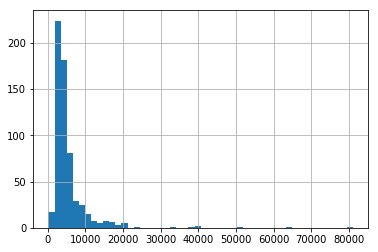

In [89]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50)
# There are some outliers/extreme values as per the Income of the applicants

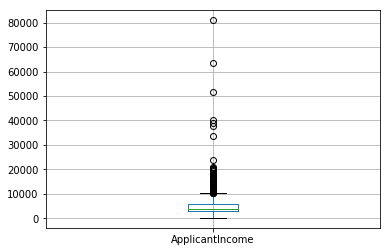

In [98]:
df.boxplot(column='ApplicantIncome')
#We can see that there extreme values presented in the dataset hence shows the difference in the income of the society

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


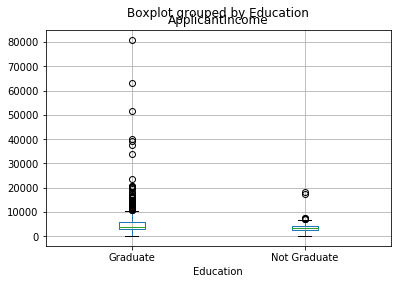

In [99]:
#Lets focus on the Income and how it is dependent on education 
df.boxplot(column='ApplicantIncome', by = 'Education')
# It shows that Highly educated or people who are graduate, have high Income (Outliers) whereas the mean Income doesn't have much difference

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


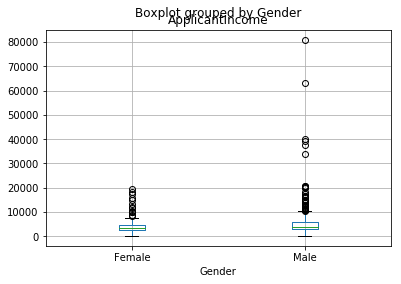

In [100]:
df.boxplot(column='ApplicantIncome', by = 'Gender')
#Male Applicants having high Income as compared to female which are outliers as well

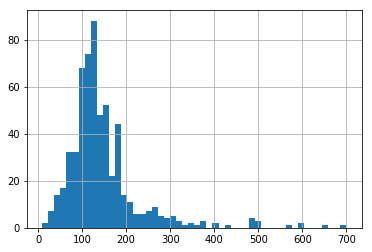

In [111]:
df['LoanAmount'].hist(bins=50)
# There are some outliers in the LoanAmount

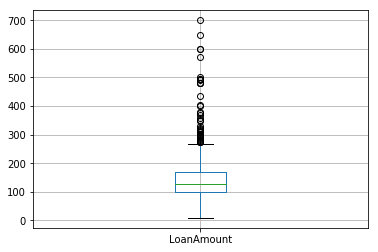

In [93]:
df.boxplot(column='LoanAmount')
#LoanAmount has 22 missing values as well as Outlier values so we need to do some Data Munging
#Where as ApplicantIncome has some extreme values.

In [151]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:' )
print (temp1)

print ('\nProbability of getting loan for each Credit History class:') 
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


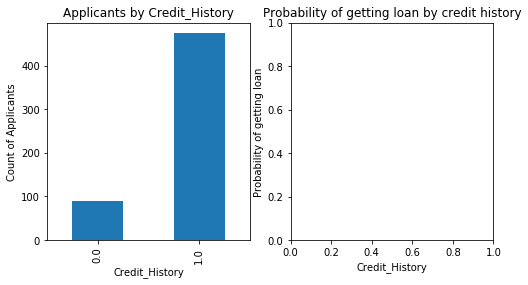

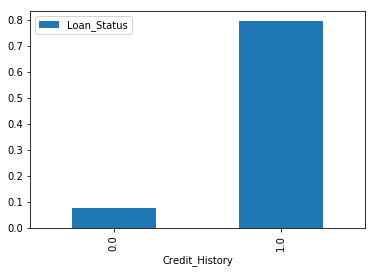

In [148]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')


#Plotting the probability(mean of Loan_Status) with Credit_History 1(Yes) and 0(No)
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind = 'bar')

#Hence, we can see the chances of getting Loan with a Credit History has higher possibility

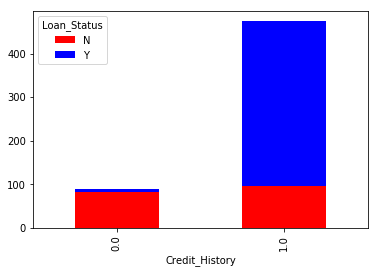

In [147]:
#Stacked plot of Loan_Status: We can see that even with having Credit_History, there are some applicatns who can't have the loan
# Similarly, There are some without Credit_History are eligible for Loan
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

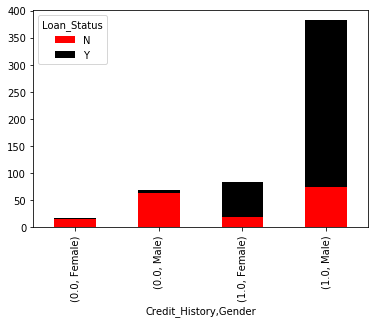

In [182]:
#--------M-CREDIT_HISTORY,F-CREDIT_HISTORY,M-NO CREDIT_HISTORY,F-NO CREDIT_HISTORY------
# NUMBER OF FEMALES ARE REALLY LESS AS COMPARED TO MALE WITH OR WITHOUT CREDIT HISTORY
# AS WELL THERE ARE APPLICANTS WITHOUT CREDIT_HISTORYWITH LOAN_STATUS POSITIVE
temp4=pd.crosstab(index=[df["Credit_History"],df["Gender"]], columns=df["Loan_Status"], margins=False)
temp4.plot(kind='bar', stacked=True, color=['red','black'], grid=False)